# Gallery of simple Altair charts

The aim of this notebook is to show how to create simple charts/diagrams with `altair`. For comparison there also several diagrams in `matplotlib`/`seaborn`. 

In [1]:
from typing import *

import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
plt.style.use("fivethirtyeight")

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Altair Theme

In [3]:
import altair as alt

def adhoc_theme():
    theme_dict = {
        'config': {"view"      : {"height":400, "width":800 },
                   "title"     : {"fontSize":24, "fontWeight":"normal", "titleAlign":"center"},
                   "axisLeft"  : {"labelFontSize":14, "titleFontSize":16},
                   "axisRight" : {"labelFontSize":14, "titleFontSize":16},
                   "header"    : {"labelFontSize":14, "titleFontSize":16, "titleAlign":"left"},
                   "axisBottom": {"labelFontSize":14, "titleFontSize":16},
                   "legend"    : {"labelFontSize":12, "titleFontSize":14}
    }}
    return theme_dict

alt.themes.register("adhoc_theme", adhoc_theme)
alt.themes.enable("adhoc_theme");
#alt.themes.enable("fivethirtyeight");

In [4]:
try:
    from adhoc.processing import Inspector
    from adhoc.utilities import load_iris, load_boston
    
except ImportError:
    import sys
    sys.path.append("..")
    from adhoc.processing import Inspector
    from adhoc.utilities import load_iris, load_boston

## Data

In [5]:
np.random.seed(1)

df_iris = load_iris(target="species")
df_iris["cat1"] = np.random.choice(["a","b","c"], size=len(df_iris), replace=True)
df_iris["cat2"] = (df_iris.iloc[:,0]*df_iris.iloc[:,1] - df_iris.iloc[:,2]*df_iris.iloc[:,3] > 11)
df_iris["cat2"] = df_iris["cat2"].astype(np.int)

Inspector(df_iris)

,dtype,count_na,rate_na,n_unique,distinct,variable,sample_value
sepal_length,float64,0,0.0,35,False,continuous,6.6
sepal_width,float64,0,0.0,23,False,continuous,2.6
petal_length,float64,0,0.0,43,False,continuous,4.3
petal_width,float64,0,0.0,22,False,continuous,0.6
species,object,0,0.0,3,False,categorical,versicolor
cat1,object,0,0.0,3,False,categorical,a
cat2,int64,0,0.0,2,False,binary,1


In [6]:
df_boston = load_boston()
Inspector(df_boston)

,dtype,count_na,rate_na,n_unique,distinct,variable,sample_value
CRIM,float64,0,0.0,504,False,continuous,0.12083
ZN,float64,0,0.0,26,False,continuous,52.50000
INDUS,float64,0,0.0,76,False,continuous,1.22000
CHAS,float64,0,0.0,2,False,binary,0.00000
NOX,float64,0,0.0,81,False,continuous,0.44200
RM,float64,0,0.0,446,False,continuous,6.69600
AGE,float64,0,0.0,356,False,continuous,47.20000
DIS,float64,0,0.0,412,False,continuous,4.69470
RAD,float64,0,0.0,9,False,categorical,8.00000
TAX,float64,0,0.0,66,False,continuous,188.00000


## Scatter Plot

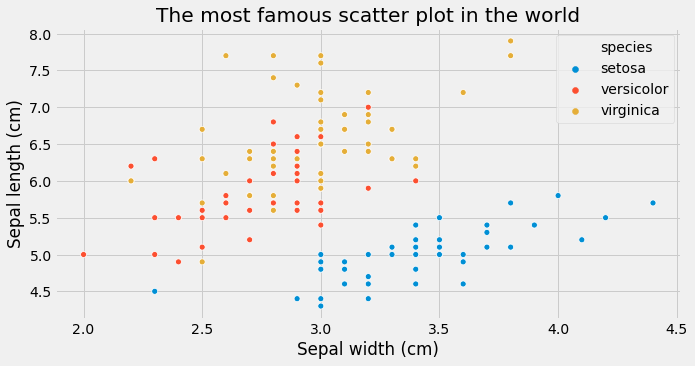

In [7]:
ax = sns.scatterplot(x="sepal_width", y="sepal_length", hue="species", data=df_iris)
ax.set_title("The most famous scatter plot in the world")
ax.set_xlabel("Sepal width (cm)")
ax.set_ylabel("Sepal length (cm)");

In [8]:
alt.Chart(df_iris).mark_circle()\
   .encode(x=alt.X("sepal_width:Q", scale=alt.Scale(zero=False), title="Sepal width (cm)"), 
           y=alt.Y("sepal_length:Q", scale=alt.Scale(zero=False), title="Sepal length (cm)"),
           color=alt.Color("species:N"))\
   .properties(title="The most famous scatter plot in the world")

alt.Chart(...)

In [9]:
alt.Chart(df_iris)\
   .mark_point()\
   .encode(x=alt.X("petal_width:Q", scale=alt.Scale(zero=False), title="Petal width (cm)"),
           y=alt.Y("petal_length:Q", scale=alt.Scale(zero=False), title="Petal length (cm)"),
           color=alt.Color("sepal_width:Q", title="Sepal width (cm)"),
           shape="species:N")

alt.Chart(...)

In [10]:
num_cols = [c for c in df_boston.columns if c not in ["CHAS","PRICE"]]

alt.Chart(df_boston)\
   .transform_fold(fold=num_cols, as_=["variable","value"])\
   .mark_circle()\
   .encode(x=alt.X("value:Q", title=None, scale=alt.Scale(zero=False)), 
           y="PRICE:Q",
           facet=alt.Facet("variable:N", title=None, columns=3))\
   .resolve_scale(x="independent")\
   .properties(height=200, width=200, title="Scatter Plots: features and the target")

alt.Chart(...)

In [11]:
alt.Chart(df_iris)\
   .mark_circle()\
   .encode(alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
           alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
           color='species:N')\
   .properties(width=150, height=150)\
   .repeat(row=df_iris.columns[:4].tolist(), column=df_iris.columns[:4].tolist())

alt.RepeatChart(...)

## Bar Chart / Histogram

### Just counting

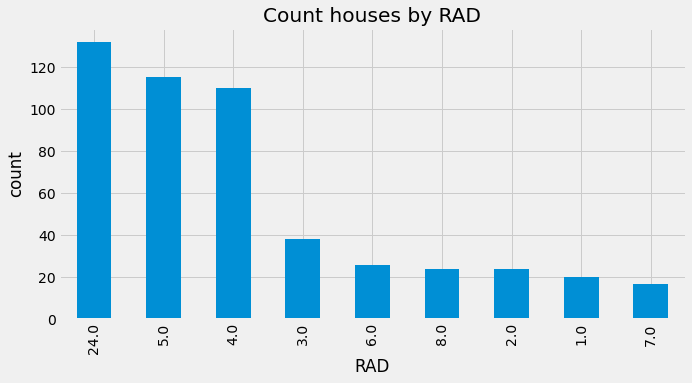

In [12]:
ax = df_boston["RAD"].value_counts().plot.bar();
ax.set_xlabel("RAD")
ax.set_ylabel("count")
ax.set_title("Count houses by RAD");

In [13]:
alt.Chart(df_boston)\
   .mark_bar()\
   .encode(x=alt.X("RAD:N", sort="-y"),
           y=alt.Y("count()"),
           tooltip="count()")\
   .properties(title="Count houses by RAD")

alt.Chart(...)

In [14]:
dg = df_iris.groupby(["cat2","species"]).size().rename("n_data").reset_index()
dg

,cat2,species,n_data
0,0,setosa,1
1,0,versicolor,25
2,0,virginica,46
3,1,setosa,49
4,1,versicolor,25
5,1,virginica,4


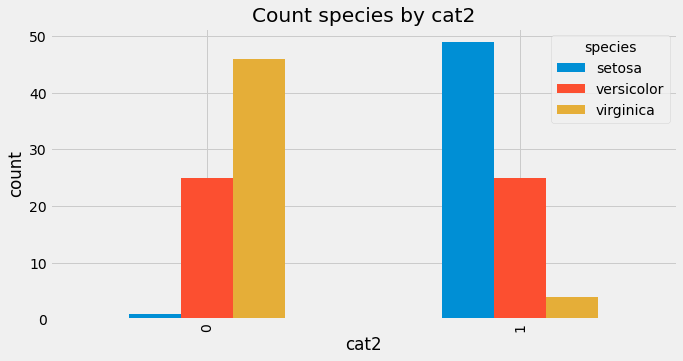

In [15]:
## matplotlib requires a wide format
ax = dg.pivot(index="cat2", columns="species", values="n_data").plot.bar(stacked=False)
ax.set_ylabel("count")
ax.set_title("Count species by cat2");

In [16]:
alt.Chart(dg)\
   .mark_bar()\
   .encode(x=alt.X("species:N", axis=alt.Axis(labelAngle=0)), 
           y=alt.Y("n_data"), color="species", tooltip=["n_data"],
           column="cat2")\
   .properties(width=400, title="Count species by cat2")

alt.Chart(...)

In [17]:
alt.Chart(df_iris)\
   .mark_bar()\
   .encode(x=alt.X("species:N", axis=alt.Axis(labelAngle=0)), 
           y=alt.Y("count()"), color="species", tooltip=["count()"],
           column="cat2")\
   .properties(width=400, title="Count species by cat2 (without group by)")

alt.Chart(...)

### Distribution of a categorical variable by category

In [18]:
dg_prop = pd.merge(dg, dg.groupby("cat2")["n_data"].sum().rename("total_by_cat2"), on="cat2")
dg_prop["proportion"] = dg_prop["n_data"]/dg_prop["total_by_cat2"]
dg_prop

,cat2,species,n_data,total_by_cat2,proportion
0,0,setosa,1,72,0.013889
1,0,versicolor,25,72,0.347222
2,0,virginica,46,72,0.638889
3,1,setosa,49,78,0.628205
4,1,versicolor,25,78,0.320513
5,1,virginica,4,78,0.051282


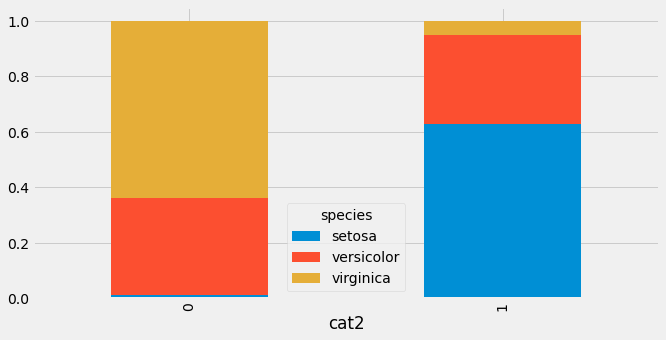

In [19]:
dg_prop.pivot(index="cat2", columns="species", values="proportion").plot.bar(stacked=True);
## how can we transpose the diagram?? 

In [20]:
alt.Chart(dg_prop)\
   .mark_bar()\
   .encode(x=alt.X("proportion:Q", axis=alt.Axis(format="%")),
           y=alt.Y("cat2:N"),
           color="species:N",
           tooltip=["species:N", alt.Tooltip("proportion:Q", format="%")])\
   .properties(title="Distribution of species by cat2", height=100)

alt.Chart(...)

In [21]:
## It is not clear how to generate such a diagram by matplotlib/seaborn

alt.Chart(dg_prop)\
   .mark_bar()\
   .encode(x=alt.X("species:N", axis=alt.Axis(labelAngle=0)), 
           y=alt.Y("proportion:Q", axis=alt.Axis(format="%")),
           color="species:N", 
           row="cat2",
           tooltip=["species:N", alt.Tooltip("proportion:Q", format="%")])\
   .properties(width=600, height=150, title="Distribution of species by cat2")

alt.Chart(...)

### Histogram

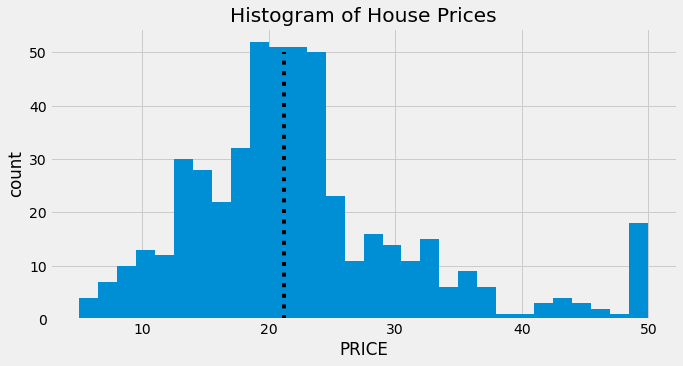

In [22]:
ax = df_boston["PRICE"].hist(bins=30)
ax.plot([df_boston["PRICE"].median()]*2, [0,50], ":k")
ax.set_xlabel("PRICE")
ax.set_ylabel("count")
ax.set_title("Histogram of House Prices");

In [23]:
alt.Chart(df_boston)\
   .mark_bar()\
   .encode(x=alt.X("PRICE:Q", bin=alt.Bin(maxbins=30)),
           y=alt.Y("count()"))\
   .properties(title="Histogram of House Prices")

alt.Chart(...)

### Adding Rules 

    chart.mark_rule(color="red", size=2, strokeDash=[5,5])\
         .transform_calculate(y="45")\
         .encode(y=alt.Y("y:Q", title="count"))

Remarks:

- `strokeDash` realizes a dashed line.
- Specify the value in `transform_calculate`. Note that we always need a string.
- We have to specify variable type (Q,N,O) in `encode`, because we gave the value as a string.

In [24]:
base = alt.Chart(df_boston)

hist = base.mark_bar()\
           .encode(x=alt.X("PRICE:Q", bin=alt.Bin(maxbins=30)),
                   y=alt.Y("count()"))\
           .properties(title="Histogram of House Prices")

vline = base.mark_rule(color="lightgreen")\
            .transform_calculate(PRICE=str(df_boston["PRICE"].mean()))\
            .encode(x=alt.X("PRICE", title="PRICE")) ## title will be overwritten.

hline = base.mark_rule(color="red", size=2, strokeDash=[5,5])\
            .transform_calculate(y="45")\
            .encode(y=alt.Y("y:Q", title="count"), tooltip=["y:Q"])

hist + vline + hline

alt.LayerChart(...)

## Heatmap

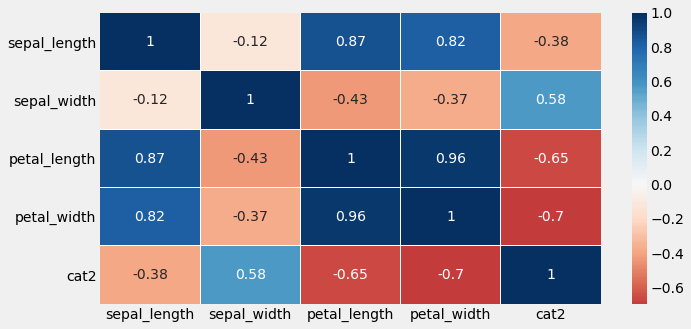

In [25]:
sns.heatmap(df_iris.corr(), annot=True, linewidths=0.1, center=0, cmap="RdBu");

In [26]:
def correlation_heatmap(data:pd.DataFrame, annot:bool=True) -> alt.Chart:
    df_corr = data.corr().reset_index()

    ## convert a long format: [index, variable, value]
    base = alt.Chart(df_corr)\
              .transform_fold(fold=df_corr.columns[1:].tolist(),
                              as_=["variable","value"])

    heat = base.mark_rect()\
               .encode(x=alt.X("index:N", title="", axis=alt.Axis(labelAngle=0)),
                       y=alt.Y("variable:N", title=""),
                       color=alt.Color("value:Q",
                                       scale=alt.Scale(scheme='redblue', domain=[-1,1]), 
                                       title="Correlation"),
                       tooltip=["index:N","variable:N","value:Q"])

    if annot:
        text = base.mark_text(fontSize=16)\
                   .encode(x="index:N", y="variable:N", 
                           text=alt.Text("value:Q", format="0.3f"),
                           color=alt.condition(abs(alt.datum.value) > 0.5, 
                                               alt.value("white"), alt.value("black")))
        return heat + text
    
    else:
        return heat

correlation_heatmap(df_iris, annot=True).properties(title="Correlation", width=600, height=300)

alt.LayerChart(...)

## Kernel Density Estimate

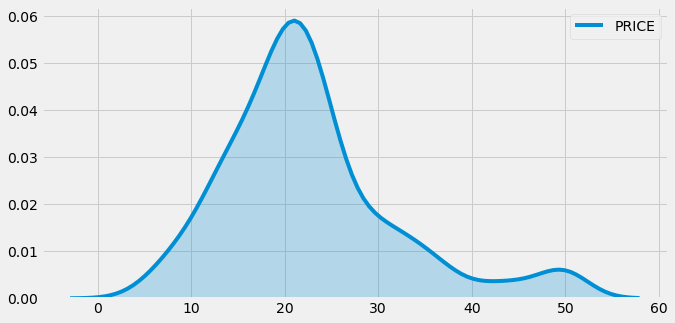

In [27]:
sns.kdeplot(data=df_boston["PRICE"], shade=True);

In [28]:
alt.Chart(df_boston)\
   .transform_density(density="PRICE", as_=["PRICE","density"], extent=[0,60])\
   .mark_area(line=True, fillOpacity=0.3)\
   .encode(alt.X("PRICE:Q"), alt.Y("density:Q"))\
   .properties(height=200)

alt.Chart(...)

## Distribution of a continuous variable by category

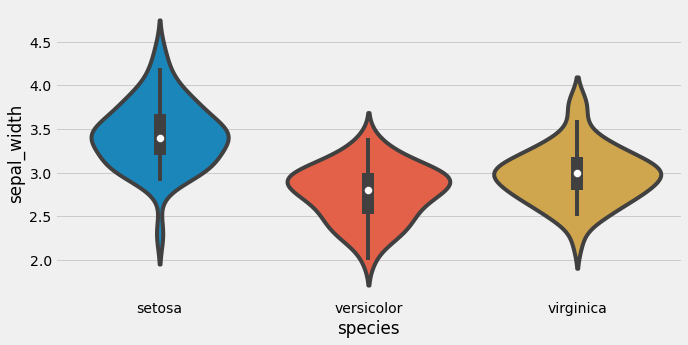

In [29]:
sns.violinplot(data=df_iris, x="species", y="sepal_width");

In [30]:
alt.Chart(df_iris)\
   .transform_density(density="sepal_width", as_=['sepal_width', 'density'],
                      groupby=['species'], extent=[1,5])\
   .mark_area(orient="horizontal", fillOpacity=0.4)\
   .encode(y='sepal_width:Q',
           color='species:N',
           x=alt.X("density:Q", stack='center', impute=None, title=None,
                   axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)),
           column=alt.Column('species:N',
                             header=alt.Header(titleOrient='bottom', labelOrient='bottom'),
    )
).configure_facet(spacing=0).configure_view(stroke=None).properties(width=200)

alt.Chart(...)

In [31]:
cols = df_iris.columns[:4].tolist()

alt.Chart(df_iris)\
   .transform_fold(cols, as_=["variable","value"])\
   .mark_boxplot(size=30)\
   .encode(y=alt.Y("species:N", axis=alt.Axis(labelAngle=0), title=None),
           x="value:Q", row=alt.Row("variable:N"), color="species")\
   .properties(height=100, width=700, title="Box plot of variables by species")

alt.Chart(...)

In [32]:
alt.Chart(df_iris.melt(id_vars="species", value_vars=cols))\
   .transform_density(density="value", groupby=["species","variable"], as_=["value","density"])\
   .mark_area(line=True, opacity=0.3)\
   .encode(x=alt.X("value:Q", title=None), y=alt.Y("density:Q"), color="species:N", 
           row=alt.Row("variable:N", title=None), 
           tooltip=["species:N"])\
   .resolve_scale(x="independent", y="independent")\
   .properties(height=90, title="Distribution of continuous variables by species")

alt.Chart(...)

In [33]:
alt.Chart(df_iris)\
   .transform_density(density="petal_length", groupby=["species"], extent=[1,7],
                      as_=["value","density"])\
   .mark_area(line=True, opacity=0.3)\
   .encode(x="value:Q", y="density:Q", color="species", tooltip=["species"])\
   .properties(height=200)

alt.Chart(...)

### Empirical cumulative distribution

In [34]:
def ecdf(s:pd.Series) -> alt.Chart:
    """
    Draw the empirical cumulative distribution of the given series.
    The style of the diagram comes from ggplot2 `stat_ecdf(geom="step")`.
    
    :param s: Series of numerical values 
    """

    field_name = s.name
    df_ecdf = s.value_counts().sort_index().reset_index()
    df_ecdf.rename({"index": field_name, field_name: "count"}, axis=1, inplace=True)

    ## empirical distribution
    df_ecdf["dist"] = df_ecdf["count"]/len(s)
    df_ecdf["cum_dist"] = df_ecdf["dist"].cumsum()
    
    ## step chart of the empirical cumulative distribution
    base = alt.Chart(df_ecdf)\
              .mark_area(line=True, opacity=0.3, interpolate="step-after")\
              .encode(x=f"{field_name}:Q", y=alt.Y("cum_dist:Q", axis=alt.Axis(format="%")))

    ## quantile
    df_q = s.quantile(q=[0, 0.25, 0.5, 0.75, 1]).reset_index()
    df_q.rename({"index":"q"}, axis=1, inplace=True)
    
    ## points of quantiles with tooltip
    q_point = alt.Chart(df_q)\
                 .mark_circle(size=80, color="black")\
                 .encode(x=f"{field_name}:Q", 
                         y=alt.Y("q:Q", title="Cumulative probability"), 
                         tooltip=["{field_name}:Q",alt.Tooltip("q:Q", format="%")])
    
    return base + q_point

ecdf(df_iris["sepal_length"].rename("Sepal length (cm)")).properties(height=200)

alt.LayerChart(...)

## abline

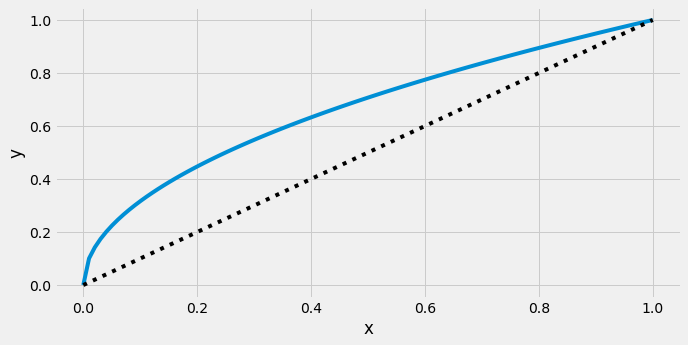

In [35]:
df_tmp = pd.DataFrame({"x":np.linspace(start=0, stop=1, num=100)})
df_tmp["y"] = np.sqrt(df_tmp["x"])

ax = sns.lineplot(data=df_tmp, x="x", y="y")
ax.plot([0,1],[0,1],":k"); ## abline

In [36]:
base = alt.Chart(df_tmp)\
          .mark_line()\
          .encode(x="x:Q", y="y:Q")

source = alt.sequence(start=0, stop=1.01, step=0.01, as_='x')

abline = alt.Chart(source)\
            .mark_line(color="black", size=2, strokeDash=[5,5])\
            .transform_calculate(y="datum.x")\
            .encode(x="x:Q", y="y:Q")

(base + abline).properties(height=300, width=300)

alt.LayerChart(...)

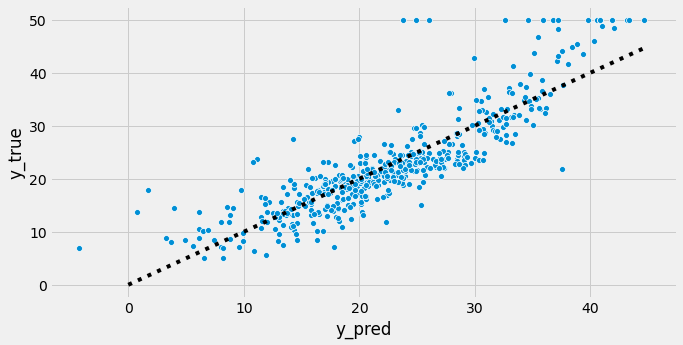

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_boston.drop("PRICE",axis=1), df_boston["PRICE"])

df_pred = pd.DataFrame({
    "y_pred": lr.predict(df_boston.drop("PRICE",axis=1)),
    "y_true": df_boston["PRICE"].values
})

ax = sns.scatterplot(data=df_pred, x="y_pred", y="y_true")
ax.plot([0,45],[0,45],":k");

In [38]:
base = alt.Chart(df_pred)\
          .mark_circle()\
          .encode(x="y_pred:Q", y="y_true:Q")

source = alt.sequence(start=0, stop=45.01, step=0.01, as_="y_pred")

abline = alt.Chart(source)\
            .mark_line(color="black", size=2, strokeDash=[5,5])\
            .transform_calculate(y_true="datum.y_pred")\
            .encode(x="y_pred:Q", y="y_true:Q")

(base + abline).properties(height=300, width=600)

alt.LayerChart(...)

## Annotation

In [39]:
np.random.seed(1)

df_random = pd.DataFrame(np.random.randn(100,2), columns=["x","y"])
df_random["r"] = np.sqrt(df_random["x"]**2 + df_random["y"]**2)
df_random["id"] = ["C%03d" % i for i in np.arange(df_random.shape[0])]

Inspector(df_random)

,dtype,count_na,rate_na,n_unique,distinct,variable,sample_value
x,float64,0,0.0,100,True,continuous,-0.375285
y,float64,0,0.0,100,True,continuous,-0.319802
r,float64,0,0.0,100,True,continuous,2.45886
id,object,0,0.0,100,True,categorical,C098


In [40]:
base = alt.Chart(df_random)\
          .mark_circle()\
          .encode(x="x:Q", y="y:Q")

seq = alt.sequence(start=0, stop=2*3.142, step=0.001, as_="t")

circle = alt.Chart(seq)\
            .mark_line(color="black", size=1, strokeDash=[5,5])\
            .transform_calculate(x="2*cos(datum.t)", y="2*sin(datum.t)")\
            .encode(x="x:Q", y="y:Q", order="t:Q")

base + circle

alt.LayerChart(...)

In [41]:
scatter_in = alt.Chart(df_random)\
                .transform_filter("datum.r < 2")\
                .mark_circle()\
                .encode(x="x:Q", y="y:Q")

scatter_out = alt.Chart(df_random)\
                 .transform_filter("datum.r >= 2")\
                 .mark_circle(color="red")\
                 .encode(x="x:Q", y="y:Q")

annot = scatter_out.mark_text(color="red", dx=24, size=14)\
                   .encode(x="x:Q", y="y:Q", text="id:N", tooltip=["id"])

scatter_in + scatter_out + circle + annot

alt.LayerChart(...)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_boston = pd.DataFrame(scaler.fit_transform(df_boston[num_cols]), 
                        columns=num_cols, index=df_boston.index)

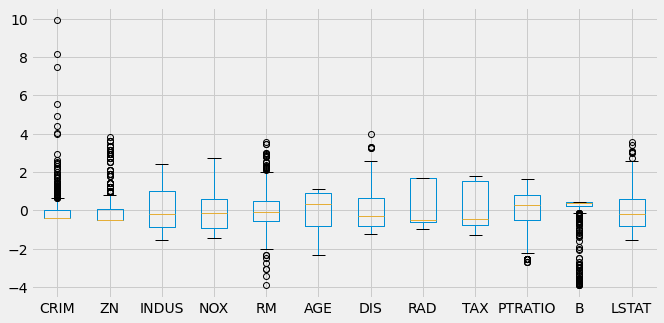

In [43]:
X_boston.boxplot();

In [44]:
g = alt.Chart(X_boston)\
       .transform_fold(fold=num_cols, as_=["field","value"])\
       .mark_boxplot()\
       .encode(x=alt.X("field:N", axis=alt.Axis(labelAngle=0)), y="value:Q")

h = alt.Chart(X_boston)\
       .transform_calculate(value="0")\
       .mark_rule(color="green", strokeDash=[5,5])\
       .encode(y="value:Q")

(g+h).properties(title="Boxplot of z-scores of fields", height=240)

alt.LayerChart(...)

## Environment

In [45]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,matplotlib,seaborn,altair,torch

Sun Jul 05 2020 

CPython 3.7.0
IPython 7.16.1

numpy 1.18.0
scipy 1.5.0
sklearn 0.23.1
pandas 1.0.5
matplotlib 3.2.2
seaborn 0.10.1
altair 4.1.0
torch not installed

compiler   : GCC 7.2.0
system     : Linux
release    : 4.12.14-lp151.28.52-default
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
